In [2]:
#Import all relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

import plotly.express as px
 
## This statement allows the visuals to render within your Jupyter Notebook.
%matplotlib inline

## Loading the data

In [3]:
df1 = pd.read_csv("/work/Word Rank University.csv")
df2 = pd.read_csv("/work/shanghai Ranking.csv")

### Viewing the dataframe

In [ ]:
df1.head()

,World Rank,University Names,Location,National Rank,Educational Rank,Employability Rank,Faculty Rank,Research Rank,Score
0,1Top 0.1%,Harvard University\n CWUR Rating System: Ed...,USA,1,1,1,1,1,100.0
1,2Top 0.1%,Massachusetts Institute of Technology\n Educa...,USA,2,4,12,3,9,96.7
2,3Top 0.1%,Stanford University\n Education: A+; Employab...,USA,3,11,4,2,2,95.2
3,4Top 0.1%,University of Cambridge\n Education: A+; Empl...,United Kingdom,1,3,25,5,11,94.1
4,5Top 0.1%,University of Oxford\n Education: A+; Employa...,United Kingdom,2,7,27,9,4,93.3


In [ ]:
df2.head()

,Ranking,University Name,National/Regional Rank,Total Score,LOGO,University Detail
0,1,Harvard University,1,100.0,http://www.shanghairanking.com/_uni/logo/032bd...,http://www.shanghairanking.com/institution/har...
1,2,Stanford University,2,76.8,http://www.shanghairanking.com/_uni/logo/13de8...,http://www.shanghairanking.com/institution/sta...
2,3,Massachusetts Institute of Technology (MIT),3,70.1,http://www.shanghairanking.com/_uni/logo/79165...,http://www.shanghairanking.com/institution/mas...
3,4,University of Cambridge,1,69.6,http://www.shanghairanking.com/_uni/logo/8d986...,http://www.shanghairanking.com/institution/uni...
4,5,"University of California, Berkeley",4,65.3,http://www.shanghairanking.com/_uni/logo/0ff17...,http://www.shanghairanking.com/institution/uni...


## 1. Data Profiling:

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   World Rank          2000 non-null   object 
 1   University Names    2000 non-null   object 
 2   Location            2000 non-null   object 
 3   National Rank       2000 non-null   int64  
 4   Educational Rank    2000 non-null   object 
 5   Employability Rank  2000 non-null   object 
 6   Faculty Rank        2000 non-null   object 
 7   Research Rank       2000 non-null   object 
 8   Score               2000 non-null   float64
dtypes: float64(1), int64(1), object(7)
memory usage: 140.8+ KB


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Ranking                 1000 non-null   object 
 1   University Name         1000 non-null   object 
 2   National/Regional Rank  1000 non-null   object 
 3   Total Score             1000 non-null   float64
 4   LOGO                    1000 non-null   object 
 5   University Detail       1000 non-null   object 
dtypes: float64(1), object(5)
memory usage: 47.0+ KB


In [ ]:
df1.shape

(2000, 9)

In [ ]:
df2.shape

(1000, 6)

In [ ]:
df1.describe()

,National Rank,Score
count,2000.000000,2000.00000
mean,69.245000,71.75555
std,85.538608,5.03880
min,1.000000,66.00000
25%,9.750000,67.90000
50%,33.000000,70.40000
75%,89.000000,74.30000
max,332.000000,100.00000


In [ ]:
df2.describe()

,Total Score
count,1000.000000
mean,5.943500
std,12.379624
min,0.000000
25%,0.000000
50%,0.000000
75%,7.500000
max,100.000000


In [ ]:
df1.nunique()

World Rank            2000
University Names      2000
Location                95
National Rank          332
Educational Rank       439
Employability Rank    1030
Faculty Rank           262
Research Rank         1935
Score                  236
dtype: int64

In [ ]:
df2.nunique()

Ranking                     93
University Name           1000
National/Regional Rank     136
Total Score                106
LOGO                      1000
University Detail         1000
dtype: int64

In [ ]:
df1.duplicated().sum()

0

In [ ]:
df2.duplicated().sum()

0

In [ ]:
df1.sample(5)

,World Rank,University Names,Location,National Rank,Educational Rank,Employability Rank,Faculty Rank,Research Rank,Score
1724,1725Top 8.5%,European University Institute,Italy,62,-,-,-,1649,67.0
1903,1904Top 9.3%,Indian Institute of Science Education and Rese...,India,59,-,-,-,1827,66.3
448,449Top 2.2%,Kobe University,Japan,12,146,415,-,459,74.8
421,422Top 2.1%,Beijing University of Chemical Technology,China,53,-,1315,-,398,75.1
323,324Top 1.6%,University of York,United Kingdom,27,227,-,-,287,76.5


In [ ]:
df2.sample(5)

,Ranking,University Name,National/Regional Rank,Total Score,LOGO,University Detail
78,79,Sun Yat-sen University,7,27.5,http://www.shanghairanking.com/_uni/logo/46293...,http://www.shanghairanking.com/institution/sun...
0,1,Harvard University,1,100.0,http://www.shanghairanking.com/_uni/logo/032bd...,http://www.shanghairanking.com/institution/har...
955,901-1000,Saitama University,28-32,14.1,http://www.shanghairanking.com/_uni/logo-jpg/4...,http://www.shanghairanking.com/institution/sai...
556,501-600,University of Alaska - Fairbanks,128-146,0.0,http://www.shanghairanking.com/_uni/logo/2e039...,http://www.shanghairanking.com/institution/uni...
776,701-800,University of Limerick,5,0.0,http://www.shanghairanking.com/_uni/logo/f1ff2...,http://www.shanghairanking.com/institution/uni...


In [ ]:
df1.columns

Index(['World Rank', 'University Names', 'Location ', 'National Rank',
       'Educational Rank', 'Employability Rank', 'Faculty Rank',
       'Research Rank', 'Score'],
      dtype='object')

In [ ]:
df2.columns

Index(['Ranking', 'University Name', 'National/Regional Rank', 'Total Score',
       'LOGO', 'University Detail '],
      dtype='object')

In [ ]:
df1.dtypes

World Rank             object
University Names       object
Location               object
National Rank           int64
Educational Rank       object
Employability Rank     object
Faculty Rank           object
Research Rank          object
Score                 float64
dtype: object

In [ ]:
df2.dtypes

Ranking                    object
University Name            object
National/Regional Rank     object
Total Score               float64
LOGO                       object
University Detail          object
dtype: object

In [ ]:
df1.count()

World Rank            2000
University Names      2000
Location              2000
National Rank         2000
Educational Rank      2000
Employability Rank    2000
Faculty Rank          2000
Research Rank         2000
Score                 2000
dtype: int64

In [ ]:
df2.count()

Ranking                   1000
University Name           1000
National/Regional Rank    1000
Total Score               1000
LOGO                      1000
University Detail         1000
dtype: int64

### Data Quality Checks

#### 1. Reliability:

In [ ]:
# The data is from Kaggle, which has proved it's reliability and searched further we found a source from "CWUR" 

#### 2. Timeliness: 

In [ ]:
# Last Update for kaggle notboke was a year ago which proved that the data is recent

#### 3. Consistency: 




In [ ]:
# The universities names are inconsistent in both datasets.

#### 4. Relevance: 


In [ ]:
# - The available data is consistent with the objectives of the analysis 
# - All columns from the first dataset is useful and relevant to our analysis.
# - In the second dataset, there are no relevant columns we just need the first tow columns.

#### 5. Uniqueness: 


In [7]:
df1.duplicated().sum()

0

In [ ]:
df2.duplicated().sum()

0

#### 6. Completeness: 

In [ ]:
df1.isnull().sum().sort_values(ascending = False)

World Rank            0
University Names      0
Location              0
National Rank         0
Educational Rank      0
Employability Rank    0
Faculty Rank          0
Research Rank         0
Score                 0
dtype: int64

In [ ]:
df2.isnull().sum().sort_values(ascending = False)

Ranking                   0
University Name           0
National/Regional Rank    0
Total Score               0
LOGO                      0
University Detail         0
dtype: int64

#### 7. Check Accuracy:


In [ ]:
df1.dtypes

World Rank             object
University Names       object
Location               object
National Rank           int64
Educational Rank       object
Employability Rank     object
Faculty Rank           object
Research Rank          object
Score                 float64
dtype: object

In [ ]:
df2.dtypes

Ranking                    object
University Name            object
National/Regional Rank     object
Total Score               float64
LOGO                       object
University Detail          object
dtype: object

In [ ]:
# check outliers 

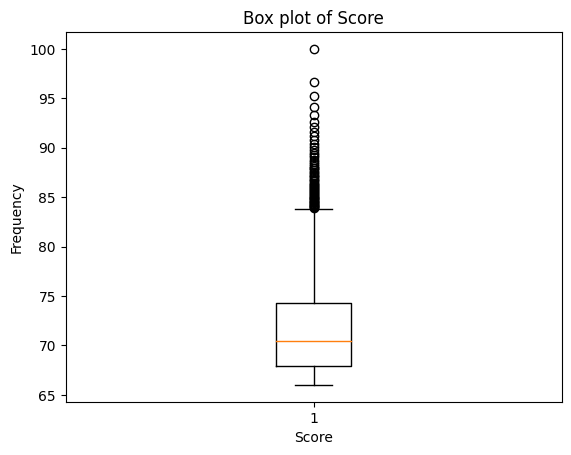

In [8]:
import matplotlib.pyplot as plt
plt.boxplot(df1["Score"])
plt.xlabel("Score")
plt.ylabel("Frequency")
plt.title(f"Box plot of Score")
plt.show()

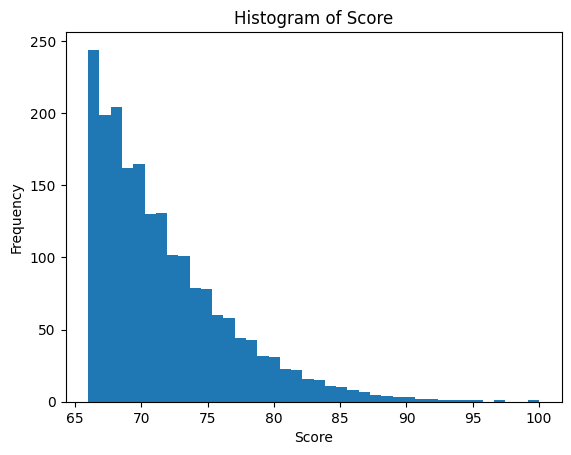

In [ ]:
plt.hist(df1['Score'],bins = 40) 
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.title(f'Histogram of Score')
plt.show()

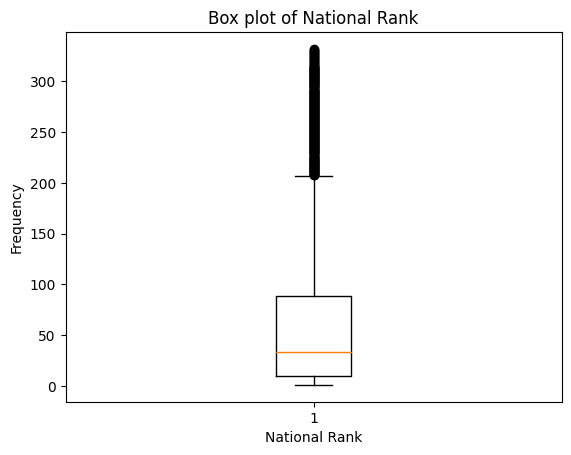

In [ ]:
import matplotlib.pyplot as plt
plt.boxplot(df1["National Rank"])
plt.xlabel("National Rank")
plt.ylabel("Frequency")
plt.title(f"Box plot of National Rank")
plt.show()

## 2. Data Cleaning: 
-------------------



### Handling missing values:

In [ ]:
(df1["National Rank"] == "-").sum()

0

In [ ]:
(df1["Educational Rank"] == "-").sum()

1562

In [ ]:
(df1["Employability Rank"] == "-").sum()

967

In [ ]:
(df1["Faculty Rank"] == "-").sum()

1727

In [ ]:
(df1["Research Rank"] == "-").sum()

66

In [9]:
df1[(df1["Research Rank"] == "-") & (df1["Employability Rank"] == "-") & (df1["Faculty Rank"] == "-")]

,World Rank,University Names,Location,National Rank,Educational Rank,Employability Rank,Faculty Rank,Research Rank,Score
488,489Top 2.4%,Antioch College,USA,134,10,-,-,-,74.4
787,788Top 3.9%,Courtauld Institute of Art,United Kingdom,50,15,-,-,-,71.8
974,975Top 4.8%,Oberlin College,USA,206,26,-,-,-,70.6
1169,1170Top 5.7%,Institute of Mathematics of the National Acade...,Ukraine,1,27,-,-,-,69.5
1338,1339Top 6.6%,Institute of Solid State Physics of the Russia...,Russia,24,47,-,-,-,68.6
1596,1597Top 7.8%,Grinnell College,USA,286,49,-,-,-,67.5


In [ ]:
df1[(df1["Research Rank"] == "-") & (df1["Employability Rank"] == "-") & (df1["Faculty Rank"] == "-") & (df1["Educational Rank"] == "-")]

,World Rank,University Names,Location,National Rank,Educational Rank,Employability Rank,Faculty Rank,Research Rank,Score


In [ ]:
df1['Educational Rank'] = df1['Educational Rank'].map(lambda x : '0' if x == '-' else x )
df1['Employability Rank'] = df1['Employability Rank'].map(lambda x : '0' if x == '-' else x )

In [ ]:
df1['Faculty Rank'] = df1['Faculty Rank'].map(lambda x : '0' if x == '-' else x )
df1['Research Rank'] = df1['Research Rank'].map(lambda x : '0' if x == '-' else x )

### Correcting errors

-------------------

In [ ]:
df1.head()

,World Rank,University Names,Location,National Rank,Educational Rank,Employability Rank,Faculty Rank,Research Rank,Score
0,1Top 0.1%,Harvard University\n CWUR Rating System: Ed...,USA,1,1,1,1,1,100.0
1,2Top 0.1%,Massachusetts Institute of Technology\n Educa...,USA,2,4,12,3,9,96.7
2,3Top 0.1%,Stanford University\n Education: A+; Employab...,USA,3,11,4,2,2,95.2
3,4Top 0.1%,University of Cambridge\n Education: A+; Empl...,United Kingdom,1,3,25,5,11,94.1
4,5Top 0.1%,University of Oxford\n Education: A+; Employa...,United Kingdom,2,7,27,9,4,93.3


In [ ]:
df1['World Rank'] = df1['World Rank'].apply(lambda x: x.split('Top')[0])

In [10]:
df1['University Names'] = df1['University Names'].apply(lambda x: x.split("\n")[0])

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   World Rank          2000 non-null   object 
 1   University Names    2000 non-null   object 
 2   Location            2000 non-null   object 
 3   National Rank       2000 non-null   int64  
 4   Educational Rank    2000 non-null   object 
 5   Employability Rank  2000 non-null   object 
 6   Faculty Rank        2000 non-null   object 
 7   Research Rank       2000 non-null   object 
 8   Score               2000 non-null   float64
dtypes: float64(1), int64(1), object(7)
memory usage: 140.8+ KB


In [ ]:
df1['World Rank'] = df1['World Rank'].astype(int)

In [ ]:
df1['Educational Rank'] = df1['Educational Rank'].astype(int)

In [ ]:
df1['Employability Rank'] = df1['Employability Rank'].astype(int)

In [ ]:
df1['Faculty Rank'] = df1['Faculty Rank'].astype(int)

In [ ]:
df1['Research Rank'] = df1['Research Rank'].astype(int)

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   World Rank          2000 non-null   int64  
 1   University Names    2000 non-null   object 
 2   Location            2000 non-null   object 
 3   National Rank       2000 non-null   int64  
 4   Educational Rank    2000 non-null   int64  
 5   Employability Rank  2000 non-null   int64  
 6   Faculty Rank        2000 non-null   int64  
 7   Research Rank       2000 non-null   int64  
 8   Score               2000 non-null   float64
dtypes: float64(1), int64(6), object(2)
memory usage: 140.8+ KB


In [ ]:
df1

,World Rank,University Names,Location,National Rank,Educational Rank,Employability Rank,Faculty Rank,Research Rank,Score
0,1,Harvard University,USA,1,1,1,1,1,100.0
1,2,Massachusetts Institute of Technology,USA,2,4,12,3,9,96.7
2,3,Stanford University,USA,3,11,4,2,2,95.2
3,4,University of Cambridge,United Kingdom,1,3,25,5,11,94.1
4,5,University of Oxford,United Kingdom,2,7,27,9,4,93.3
...,...,...,...,...,...,...,...,...,...
1995,1996,Chongqing Jiaotong University,China,314,0,0,0,1917,66.0
1996,1997,University of Arkansas at Little Rock,USA,332,0,1322,0,1920,66.0
1997,1998,Van Yüzüncü Yıl University,Turkey,54,0,0,0,1919,66.0
1998,1999,Bharathidasan University,India,64,0,0,0,1922,66.0


# Questions:

### A. Which universities are ranked in the top 10 globally?

In [ ]:
top_10_universities = df1[df1['World Rank'] <= 10]

In [ ]:
fig = px.bar(top_10_universities, 
             x='University Names', 
             y='World Rank',
             color ='University Names',  
             title='Top 10 Globally Ranked Universities',
             labels={'University Names': 'University Names', 'World Rank': 'World Rank'})


fig.show()

### B. Which universities are ranked in the top 10 for employment outcomes?

In [ ]:
top_df = df1[df1['Employability Rank'].apply(lambda x: True if x in range(1, 11) else False)]


In [ ]:
fig = px.histogram(top_df, 
                   x="University Names", 
                   y='Employability Rank',
                   title="universities ranked top 10 for employment outcomes ", 
                   color ='University Names',
                   text_auto=True).update_xaxes(categoryorder='total ascending').update_layout(
                     xaxis_title="University", yaxis_title="Employability Rank"
)
fig.show()

### C.What positions do universities in Saudi Arabia hold within the global rankings?

In [ ]:
saudi_worldRank = df1[df1["Location "] == 'Saudi Arabia']

In [ ]:
saudi_worldRank[['University Names', 'World Rank']]

,University Names,World Rank
244,King Abdulaziz University,245
278,King Abdullah University of Science and Techno...,279
351,King Saud University,352
656,King Fahd University of Petroleum and Minerals,657
1310,King Saud bin Abdulaziz University for Health ...,1311
1446,King Khalid University,1447
1508,Taif University,1509
1546,Imam Abdulrahman Bin Faisal University,1547
1585,Taibah University,1586
1710,Prince Sattam Bin Abdulaziz University,1711


In [ ]:
fig = px.scatter(saudi_worldRank, x= "University Names",
                 y = "World Rank",
                 color = "University Names",
                 title = "The World Rank for Saudi Universities")
fig.show()

### D. Considering various factors such as employment rankings, research rankings, and others, which has the most significant impact on a university's overall ranking?

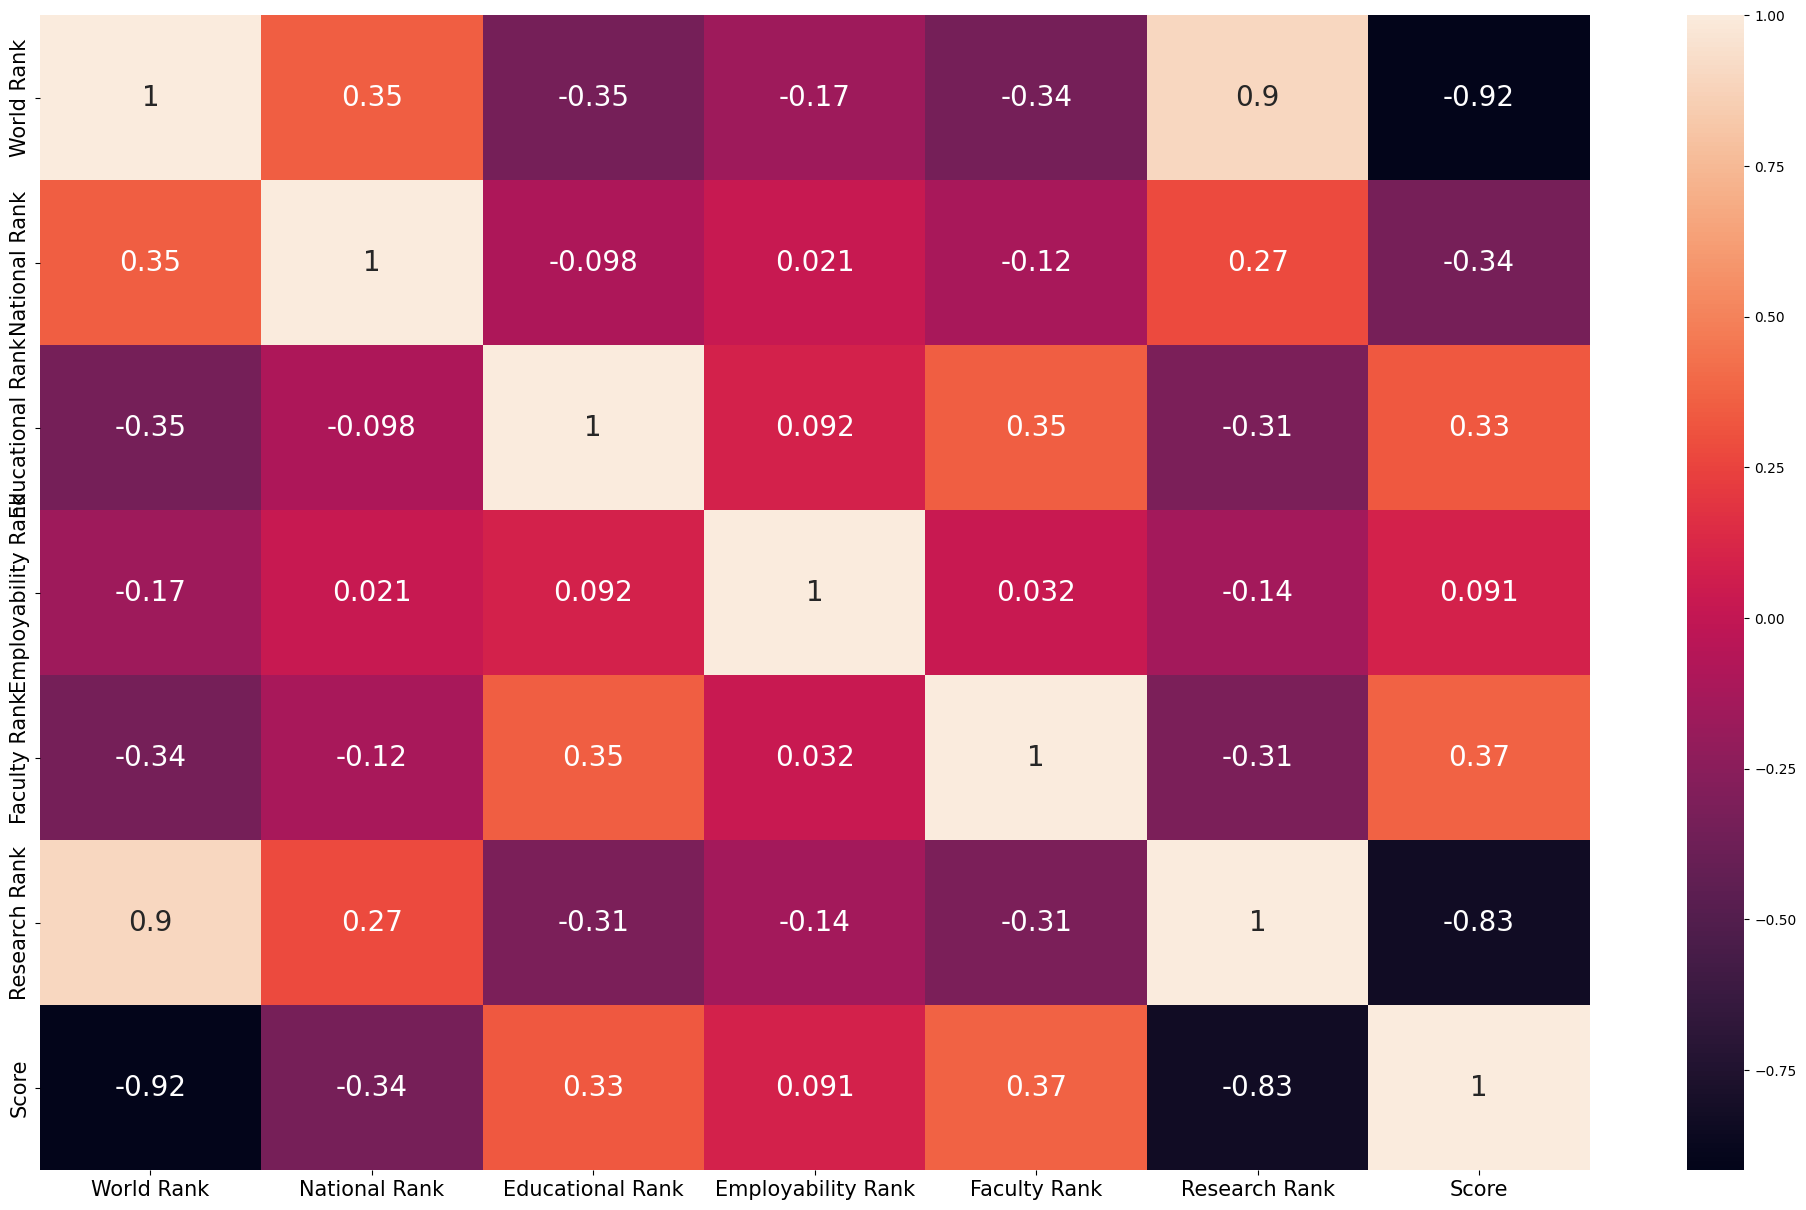

In [ ]:
numeric_df = df1.select_dtypes(include='number')

# Step 2: Compute the correlation matrix
correlation = numeric_df.corr()

# Step 3: Plot the heatmap
plt.figure(figsize=(25,15))
sns.heatmap(correlation, xticklabels=correlation.columns, yticklabels=correlation.columns, annot=True, annot_kws={'size': 20})

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

### E.Is there a correlation between national and global university rankings, and based on this information, can you recommend a country that appears to have a high concentration of top-ranked universities?

In [ ]:
correlation = df1['World Rank'].corr(df1['National Rank'])

In [ ]:
top = 10
top_universities = df1[df1['World Rank'] <= top]
country_counts = top_universities['Location '].value_counts().reset_index()
country_counts.columns = ['Country', 'Count']


In [ ]:
fig = px.pie(
    country_counts,
    names='Country',
    values='Count',
    title='Countries with the Highest Concentration of Top 10 Universities',
    color_discrete_sequence=px.colors.sequential.Plasma_r
)

fig.show()

# Bonus:

### 1. Which countries have the most universities in the ranking?

In [ ]:
county= df1["Location "].value_counts().head(10)

In [ ]:
f = px.scatter(county, y = county.values,
               title="Top 10 Countries"
               )
f.show()

### 2.What is the local ranking of Saudi universities?

In [ ]:
saudi_localRank = df1[df1["Location "] == 'Saudi Arabia']

In [ ]:
saudi_localRank[['Score', 'University Names', 'National Rank']]

,Score,University Names,National Rank
244,77.8,King Abdulaziz University,1
278,77.2,King Abdullah University of Science and Techno...,2
351,76.1,King Saud University,3
656,72.8,King Fahd University of Petroleum and Minerals,4
1310,68.8,King Saud bin Abdulaziz University for Health ...,5
1446,68.1,King Khalid University,6
1508,67.9,Taif University,7
1546,67.7,Imam Abdulrahman Bin Faisal University,8
1585,67.5,Taibah University,9
1710,67.0,Prince Sattam Bin Abdulaziz University,10


In [ ]:
fig = px.scatter(saudi_localRank, 
                 x='National Rank', 
                 y='Score',  
                 color='University Names',
                 title='National Rank vs. Score of Saudi Universities',
                 labels={'National Rank': 'National Rank', 'Score': 'Score'})

fig.show()

### 3.The Academic Ranking of World Universities (ARWU)

In [ ]:
ser = df2[[ 'University Name', 'Ranking']].head(10)

In [ ]:
f2 = px.scatter(ser,y='Ranking',                  
                  x ='University Name',
                  color='University Name',
                 title='The Academic Ranking of World Universities (ARWU)',                 
                 )
f2.show()

## 4. Which countries have the highest average university scores?

In [ ]:
average_scores = df1.groupby('Location ')['Score'].mean().reset_index()

In [ ]:
average_scores = average_scores.sort_values(by='Score', ascending=False)

In [ ]:
top5countries = average_scores.head(5)

In [ ]:
fig = px.pie(top5countries, 
             values='Score', 
             names='Location ', 
             title='Top 5 Countries with the Highest Average Scores',
             labels={'Score': 'Average Score', 'Location ': 'Country'}, 
             height=800,  
             width=1000, 
            )

fig.update_traces(textposition='inside', textinfo='percent+label+value')

fig.show()

## 5. Top 10 USA Universities in National Rank

In [12]:
USA_universities = df1[df1["Location "] == 'USA']

In [13]:
top_10_USA_universities = USA_universities.sort_values('National Rank').head(10)[['University Names', 'Score', 'National Rank']]

top_10_USA_universities

,University Names,Score,National Rank
0,Harvard University,100.0,1
1,Massachusetts Institute of Technology,96.7,2
2,Stanford University,95.2,3
5,Princeton University,92.6,4
6,University of Chicago,92.1,5
7,Columbia University,91.6,6
8,University of Pennsylvania,91.2,7
9,Yale University,90.8,8
10,California Institute of Technology,90.4,9
11,"University of California, Berkeley",90.1,10


In [14]:
fig = px.bar(              
                 top_10_USA_universities,x='National Rank', 
                 y='Score', text='National Rank', 
                 title='Top 10 USA Universities by National Rank',
                 color='University Names'
                            
            )

fig.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=717a5b0b-f044-4d1f-b7d4-5043ec1593d0' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>